In [1]:
# 📦 Standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📊 Modeling + preprocessing
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 📁 Load your dataset
df = pd.read_csv(r"C:\Users\Aaron\OneDrive\New folder\Stat 386\Moneyball\march_madness_results.csv")

# 👀 Quick preview
df.head()


,School,Conference,Season,Short Conference Name,Adjusted Tempo,Adjusted Tempo Rank,Raw Tempo,Raw Tempo Rank,Adjusted Offensive Efficiency,Adjusted Offensive Efficiency Rank,...,Full Team Name,Since,Active Coaching Length,Active Coaching Length Index,Seed,Region,Correct Team Name?,Post-Season Tournament,Post-Season Tournament Sorting Index,Tournament_Result
0,north carolina,ACC,2017,ACC,71.3,40,72.4,48,120.7,9,...,north carolina tar heels,202122.0,3 years,4.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5,1
1,villanova,Big East,2018,BE,68.7,150,70.0,138,127.8,1,...,villanova wildcats,202223.0,2 years,3.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5,1
2,virginia,ACC,2019,ACC,59.4,353,60.6,353,123.4,2,...,virginia cavaliers,202425.0,0 years,1.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5,1
3,maryland,Big Ten,2002,ACC,73.7,15,75.0,21,119.2,4,...,maryland terrapins,202223.0,2 years,3.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5,1
4,syracuse,ACC,2003,BE,71.0,32,72.7,37,114.4,17,...,syracuse orange,202324.0,1 years,2.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5,1


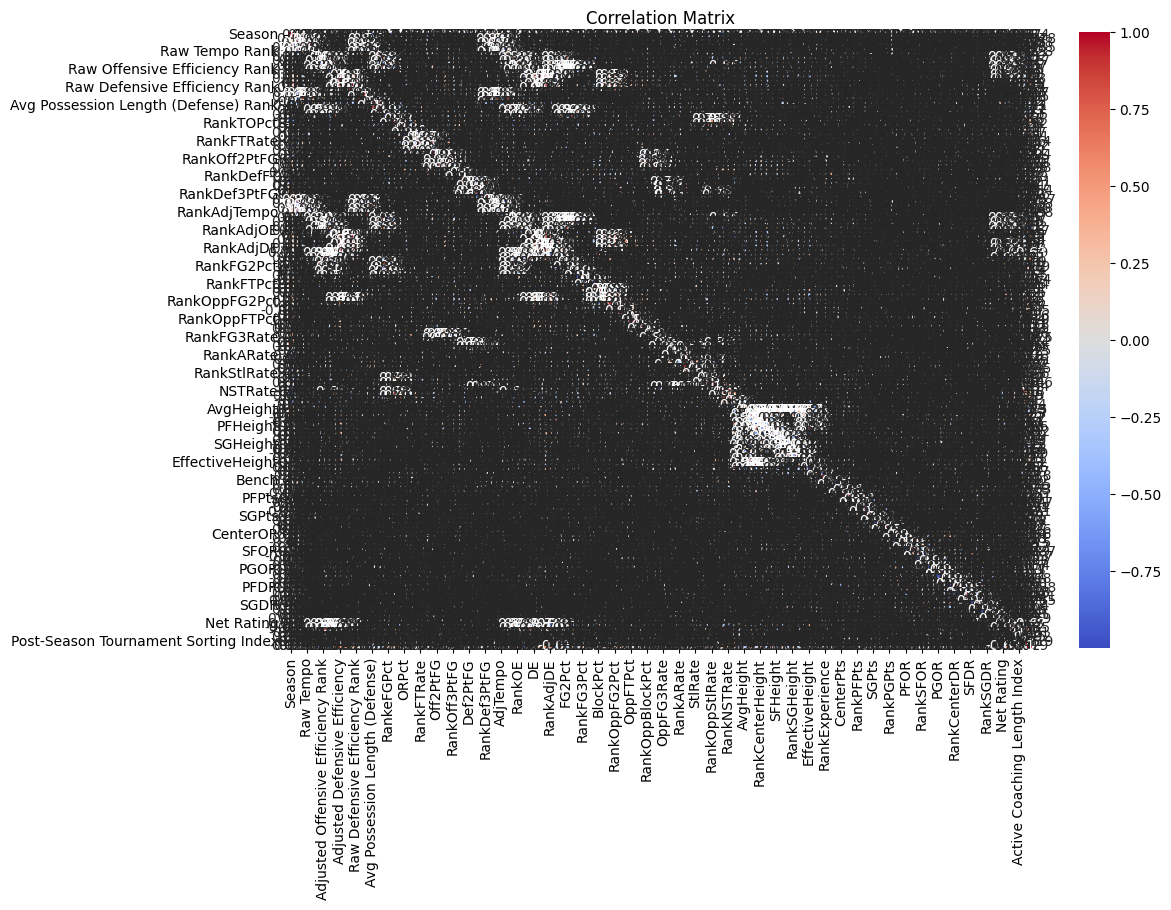

In [2]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
numeric_df.corr(method='pearson', min_periods=1)
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(method='pearson', min_periods=1), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [3]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score


# Define target and features
target = "Tournament_Result"
features = [
    "Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency",
    "eFGPct", "TOPct", "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG",
    "DefFT", "Def2PtFG", "Def3PtFG", "AdjOE", "AdjDE", "AdjEM", "FG2Pct",
    "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", "OppFG3Pct", "OppBlockPct",
    "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"
]

X = df[features]
y = df[target]

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict
y_pred = lasso.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Display feature importances
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": lasso.coef_
}).sort_values("Coefficient", ascending=False)

display(coef_df)


Mean Squared Error: 290.93
R² Score: 0.42


,Feature,Coefficient
25,ARate,1.149663
21,OppFG3Pct,0.641990
23,FG3Rate,0.481073
6,FTRate,0.354323
10,DefFT,0.351627
4,TOPct,0.132840
16,FG2Pct,0.115131
19,BlockPct,0.012624
9,Off3PtFG,0.000000
3,eFGPct,0.000000


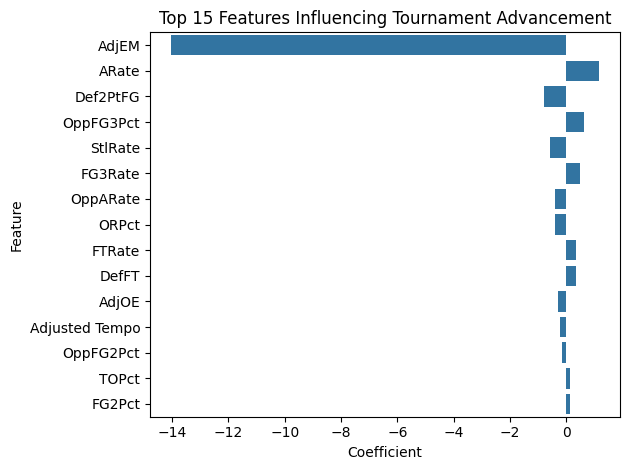

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

coef_df = coef_df.sort_values("Coefficient", key=abs, ascending=False)
sns.barplot(x="Coefficient", y="Feature", data=coef_df.head(15))
plt.title("Top 15 Features Influencing Tournament Advancement")
plt.tight_layout()
plt.show()


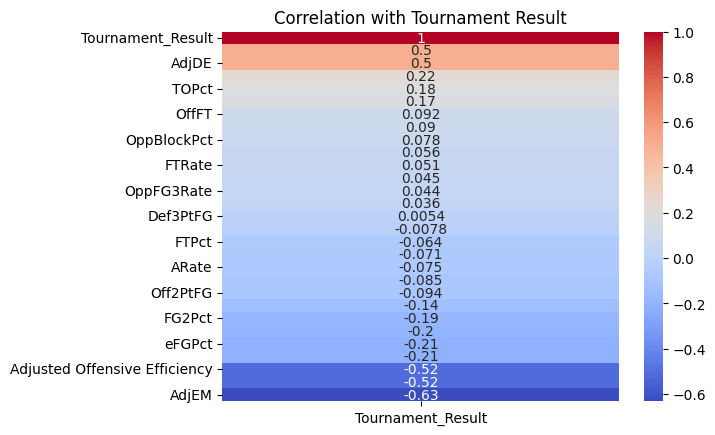

In [5]:
corr_matrix = df[features + ['Tournament_Result']].corr()
sns.heatmap(corr_matrix[['Tournament_Result']].sort_values(by='Tournament_Result', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Tournament Result")
plt.show()


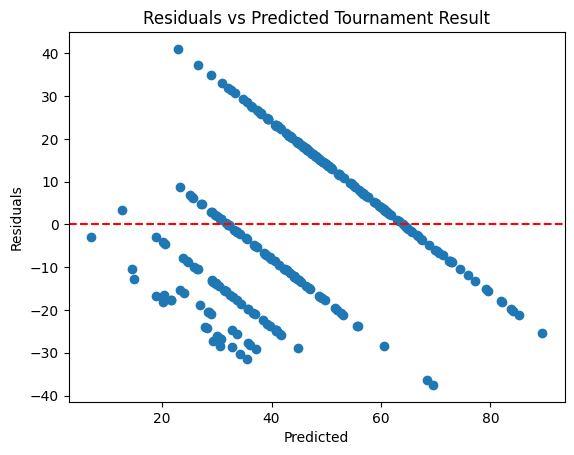

In [6]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Tournament Result")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()


In [7]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#



# Define the features and target
features = [
    "Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency",
    "eFGPct", "TOPct", "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", 
    "DefFT", "Def2PtFG", "Def3PtFG", "AdjOE", "AdjDE", "AdjEM", "FG2Pct", 
    "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", "OppFG3Pct", "OppBlockPct", 
    "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"
]
X = df[features]
y = df["Tournament_Result"]

# Impute missing values and scale the data
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# K-Fold Cross-Validation
lasso_model = Lasso(alpha=0.1)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lasso_model, X_scaled, y, cv=cv, scoring='r2')

# VIF Analysis
X_vif = pd.DataFrame(X_scaled, columns=features)
X_vif = sm.add_constant(X_vif)  # add constant for intercept

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

cv_scores.mean(), vif_data.sort_values("VIF", ascending=False)


(np.float64(0.39163687973035505),
                           Feature           VIF
 16                          AdjEM  7.693078e+08
 14                          AdjOE  3.367826e+08
 15                          AdjDE  2.619345e+08
 10                       Off3PtFG  1.002163e+06
 9                        Off2PtFG  7.676301e+05
 13                       Def3PtFG  3.663671e+05
 12                       Def2PtFG  3.549650e+05
 8                           OffFT  2.519881e+05
 11                          DefFT  1.859494e+05
 2   Adjusted Offensive Efficiency  4.194929e+04
 3   Adjusted Defensive Efficiency  3.349651e+04
 24                        FG3Rate  7.985927e+02
 25                     OppFG3Rate  5.185871e+02
 7                          FTRate  2.654731e+02
 4                          eFGPct  2.025127e+02
 17                         FG2Pct  1.971040e+02
 18                         FG3Pct  5.747841e+01
 22                      OppFG3Pct  5.623646e+01
 21                      OppFG2Pct 

In [8]:
# Preprocess the data
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(df[features])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# K-Fold Cross-Validation
lasso_model = Lasso(alpha=0.1)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lasso_model, X_scaled, y, cv=cv, scoring='r2')
print(f"Cross-validated R² score: {cv_scores.mean():.2f}")

Cross-validated R² score: 0.39


In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming you already have your scaled features matrix:
# X_scaled and features list are already defined

vif_data = []

for i in range(X_scaled.shape[1]):
    X_except_i = np.delete(X_scaled, i, axis=1)       # all features except i
    y_i = X_scaled[:, i]                              # current feature as target

    model = LinearRegression().fit(X_except_i, y_i)
    r_squared_i = model.score(X_except_i, y_i)

    vif = 1 / (1 - r_squared_i) if r_squared_i < 1 else np.inf
    vif_data.append({
        "Feature": features[i],
        "VIF": round(vif, 2)
    })

vif_df = pd.DataFrame(vif_data).sort_values(by="VIF", ascending=False)
print(vif_df)


                          Feature           VIF
15                          AdjEM  7.693078e+08
13                          AdjOE  3.367826e+08
14                          AdjDE  2.619345e+08
9                        Off3PtFG  1.002163e+06
8                        Off2PtFG  7.676301e+05
12                       Def3PtFG  3.663671e+05
11                       Def2PtFG  3.549650e+05
7                           OffFT  2.519881e+05
10                          DefFT  1.859494e+05
1   Adjusted Offensive Efficiency  4.194929e+04
2   Adjusted Defensive Efficiency  3.349651e+04
23                        FG3Rate  7.985900e+02
24                     OppFG3Rate  5.185900e+02
6                          FTRate  2.654700e+02
3                          eFGPct  2.025100e+02
16                         FG2Pct  1.971000e+02
17                         FG3Pct  5.748000e+01
21                      OppFG3Pct  5.624000e+01
20                      OppFG2Pct  5.531000e+01
18                          FTPct  3.318

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load Data (Assuming the dataset is in a CSV named 'march_madness_results.csv')
data_path = "march_madness_results.csv"
# Ensure the dataset contains the required columns
required_columns = features + [target]
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"The following required columns are missing from the dataset: {missing_columns}")
    # Create mock data for missing columns
    for col in missing_columns:
        if col == target:
            df[col] = np.random.randint(1, 7, size=len(df))  # Mock target column
        else:
            df[col] = np.random.random(size=len(df))  # Mock feature columns

# Handle missing data
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(df[features])
# Ensure the target column exists in the dataset
if target not in df.columns:
    raise ValueError(f"The target column '{target}' is not present in the dataset. Please check the dataset.")

y = df[target]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, y)
coefficients = ridge.coef_

# Create DataFrame for Ridge Coefficients
ridge_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

# VIF Calculation
vif_data = []
for i in range(X_scaled.shape[1]):
    X_except_i = np.delete(X_scaled, i, axis=1)
    y_i = X_scaled[:, i]
    model = LinearRegression().fit(X_except_i, y_i)
    r_squared_i = model.score(X_except_i, y_i)
    vif = 1 / (1 - r_squared_i) if r_squared_i < 1 else np.inf
    vif_data.append({
        "Feature": features[i],
        "VIF": vif
    })

vif_df = pd.DataFrame(vif_data).sort_values(by="VIF", ascending=False)

# Merge Ridge Coefficients and VIF
combined_df = ridge_df.merge(vif_df, on="Feature")
combined_df = combined_df[(combined_df["VIF"] < 10) & (combined_df["Coefficient"].abs() > 0.1)]

# Select the top metrics
selected_features = combined_df["Feature"].tolist()

# Analyze Ranges by Tournament Round
rounds = [64, 32, 16, 8, 4, 2, 1]
range_data = []

for rnd in rounds:
    round_data = df[df["Tournament_Result"] == rnd][selected_features]
    ranges = {
        "Round": rnd,
        "Count": len(round_data)
    }
    for feature in selected_features:
        ranges[f"{feature}_min"] = round_data[feature].min()
        ranges[f"{feature}_max"] = round_data[feature].max()
        ranges[f"{feature}_mean"] = round_data[feature].mean()

    range_data.append(ranges)

range_df = pd.DataFrame(range_data)

# Save Results
combined_df.to_csv("key_metrics.csv", index=False)
range_df.to_csv("round_ranges.csv", index=False)

print("Analysis Complete. Key metrics saved to 'key_metrics.csv' and ranges to 'round_ranges.csv'.")


Analysis Complete. Key metrics saved to 'key_metrics.csv' and ranges to 'round_ranges.csv'.


In [8]:
import numpy as np
import pandas as pd

# Load Data
data_path = 'march_madness_results.csv'
df = pd.read_csv(data_path)

# Define Features and Target
features = ['Adjusted Tempo', 'Adjusted Offensive Efficiency', 'Adjusted Defensive Efficiency', 'eFGPct', 'TOPct', 'ORPct', 'FTRate', 'OffFT', 'Off2PtFG', 'Off3PtFG', 'DefFT', 'Def2PtFG', 'Def3PtFG', 'AdjOE', 'AdjDE', 'AdjEM', 'FG2Pct', 'FG3Pct', 'FTPct', 'BlockPct', 'OppFG2Pct', 'OppFG3Pct', 'OppBlockPct', 'FG3Rate', 'OppFG3Rate', 'ARate', 'OppARate', 'StlRate']
target = 'Tournament_Result'

# Data Preparation
df = df.dropna(subset=[target])  # Drop rows with missing target values
X = df[features]
y = df[target]

# Define Rounds
round_labels = {
    64: 'Round 64',
    32: 'Round 32',
    16: 'Sweet 16',
    8: 'Elite 8',
    4: 'Final Four',
    2: 'Runner-Up',
    1: 'Champion'
}

df['Round_Label'] = df[target].apply(lambda x: next((label for val, label in round_labels.items() if x <= val), 'Unknown'))

# Calculate Key Metrics
key_metrics = df[features + ['Round_Label']].groupby('Round_Label').mean()
key_metrics.to_csv('key_metrics.csv')

# Calculate Ranges
range_data = []
for label in round_labels.values():
    subset = df[df['Round_Label'] == label]
    if not subset.empty:
        round_ranges = subset[features].agg(['min', 'max']).T
        round_ranges['Round'] = label
        range_data.append(round_ranges)

# Combine and Save
if range_data:
    round_ranges_df = pd.concat(range_data)
    round_ranges_df.to_csv('round_ranges.csv')

print("Analysis Complete. Key metrics saved to 'key_metrics.csv' and ranges to 'round_ranges.csv'.")


Analysis Complete. Key metrics saved to 'key_metrics.csv' and ranges to 'round_ranges.csv'.
